In [22]:
import csv
import pandas as pd
from sklearn.metrics import DistanceMetric

import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
# main map to read in data
food_name_map = {}

# maps to categorize into nutrient groups
food_macro_map = {}
fat_map = {}
other_macro_map = {}
vitamin_map = {}
mineral_map = {}

# load necessary categories from csv to map
with open("FOOD-DATA-GROUP1.csv", "r") as food_file:
    reader = csv.DictReader(food_file)
    for food in reader:
        food_id = food["ID"]
        food_name = food["food"]
        calories = float(food['Caloric Value'])
        fat = float(food["Fat"])
        satfat = float(food['Saturated Fats'])
        monofat = float(food['Monounsaturated Fats'])
        polyfat = float(food['Polyunsaturated Fats'])
        carbs = float(food["Carbohydrates"])
        sugar = float(food['Sugars'])
        protein = float(food["Protein"])
        fiber = float(food['Dietary Fiber'])
        cholesterol = float(food['Cholesterol'])
        sodium = float(food['Sodium'])
        water = float(food['Water'])
        vitaminA = float(food['Vitamin A'])
        vitaminB1 = float(food['Vitamin B1'])
        vitaminB11 = float(food['Vitamin B11'])
        vitaminB12 = float(food['Vitamin B12'])
        vitaminB2 = float(food['Vitamin B2'])
        vitaminB3 = float(food['Vitamin B3'])
        vitaminB5 = float(food['Vitamin B5'])
        vitaminB6 = float(food['Vitamin B6'])
        vitaminC = float(food['Vitamin C'])
        vitaminD = float(food['Vitamin D'])
        vitaminE = float(food['Vitamin E'])
        vitaminK = float(food['Vitamin K'])
        calcium = float(food['Calcium'])
        copper = float(food['Copper'])
        iron = float(food['Iron'])
        magnesium = float(food['Magnesium'])
        manganese = float(food['Manganese'])
        phosphorus = float(food['Phosphorus'])
        potassium = float(food['Potassium'])
        selenium = float(food['Selenium'])
        nutrients = float(food['Nutrition Density'])
        
        # fill maps for value/keys
        food_macro_map[food_id] = {
            "caloric value": calories,
            "protein": protein,
            "fat": fat,
            "carbohydrates": carbs,
            "nutrition density": nutrients
        }
        
        fat_map[food_id] = {
            "fat": fat,
            "saturated fats": satfat,
            "monounsaturated fats": monofat,
            "polyunsaturated fats": polyfat,
            
        }
        
        other_macro_map[food_id] = {
            'sugar' : sugar,
            'fiber' : fiber,
            'cholesterol' : cholesterol,
            'sodium' : sodium,
            'water' : water
        }
        
        vitamin_map[food_id] = {
            'vitamin A': vitaminA,
            'vitamin B1': vitaminB1,
            'vitamin B11': vitaminB11,
            'vitamin B12': vitaminB12,
            'vitamin B2': vitaminB2, 
            'vitamin B3': vitaminB3, 
            'vitamin B5': vitaminB5, 
            'vitamin B6': vitaminB6, 
            'vitamin C': vitaminC, 
            'vitamin D': vitaminD, 
            'vitamin E': vitaminE,
        }
        
        mineral_map[food_id] = {
            'calcium': calcium,
            'copper': copper,
            'iron': iron,
            'magnesium': magnesium,
            'manganese': manganese,
            'phosphorus': phosphorus,
            'potassium': potassium,
            'selenium': selenium
        }
        # fill maps for names, used in top 10 similar foods list
        food_name_map[food_id] = food_name
        fat_map[food_id] = food_name
        other_macro_map[food_id] = food_name
        vitamin_map[food_id] = food_name
        mineral_map[food_id] = food_name


food_df = pd.DataFrame(food_macro_map.values(), index=food_macro_map.keys())
food_df = food_df.fillna(0)
food_df

,caloric value,protein,fat,carbohydrates,nutrition density
0,51.0,0.900,5.000,0.8,7.070
1,215.0,7.800,19.400,3.1,130.100
2,49.0,0.800,3.600,0.9,5.400
3,30.0,1.500,2.000,1.5,5.196
4,30.0,1.200,2.300,1.2,27.007
...,...,...,...,...,...
2390,25.0,0.500,0.095,6.7,24.249
2391,1.0,0.062,0.099,0.2,0.433
2392,4.0,0.400,0.070,0.7,1.727
2393,19.0,1.800,0.300,3.3,9.400


In [25]:
# query: chicken breast raw
query = '1434'  
query_loc = food_df.loc[[query]]

# get pairwise distance from food
query_location = food_df.loc[[query]]
pairwise_dist = dist.pairwise(food_df, query_location)
query_distances = list(zip(food_df.index, pairwise_dist.flatten()))

# print top 10 most similar foods
for similar_food_id, macro_distance in sorted(query_distances, key=lambda x: x[1], reverse=False)[:10]:
    print(similar_food_id, food_name_map[similar_food_id], macro_distance)


1434 chicken breast raw 0.0
1364 pork top loin chops raw 14.34128655316531
1433 turkey meat roasted 17.51151010050247
2064 soybean cooked 19.0076429101559
1352 pork leg cap steak cooked 20.947667077744004
395 wolffish raw 21.25225531561298
353 wolffish cooked 21.484672583029976
1387 ham roasted 21.993116104817886
1356 pork leg cap steak raw 22.158076541071882
1271 turkey bacon cooked 24.278450444787453


In [27]:
# query: oranges
query = '888'  
dist = DistanceMetric.get_metric('euclidean')

# get pairwise distance from food
query_location = food_df.loc[[query]]
pairwise_dist = dist.pairwise(food_df, query_location)
query_distances = list(zip(food_df.index, pairwise_dist.flatten()))

# print top 10 most similar foods
for similar_food_id, macro_distance in sorted(query_distances, key=lambda x: x[1], reverse=False)[:10]:
    print(similar_food_id, food_name_map[similar_food_id], macro_distance)

888 orange 0.0
891 blueberries 2.4891034530529264
926 watermelon 3.0545546320208468
1559 ice tea lemon flavor nestle 3.1728739338334884
2197 butternut squash raw 4.832186358161281
984 raisins 4.889533413322788
998 nance 5.179552972989079
1574 instant lemon tea sweetened 5.30557414423736
2333 mixed vegetables canned 5.939606805168167
790 raisin bran crunch kelloggs 6.024759663256285


In [24]:
# query: string beans wellsley farms
query = '2220'  
dist = DistanceMetric.get_metric('euclidean')

# get pairwise distance from food
query_location = food_df.loc[[query]]
pairwise_dist = dist.pairwise(food_df, query_location)
query_distances = list(zip(food_df.index, pairwise_dist.flatten()))

# print top 10 most similar foods
for similar_food_id, macro_distance in sorted(query_distances, key=lambda x: x[1], reverse=False)[:10]:
    print(similar_food_id, food_name_map[similar_food_id], macro_distance)

2220 spinach raw 0.0
2125 purslane raw 2.3685438564654038
872 prickly pear raw 2.896196471236028
2375 arugula 5.230678732248812
2091 napa cabbage cooked 6.4645185435575945
2299 banana pepper 6.469930447848726
2177 endive 8.273451516749223
2166 pumpkin leaves cooked 8.36301381082203
2341 onions canned 8.545225626044058
1499 energy drink sugar free red bull 8.886512251721712


Top 10 Most Nutritionally Central Vegetables:
spinach cooked 0.519
kale cooked 0.516
yellow snap beans canned 0.512
peas onions canned 0.509
ancho pepper dried 0.507
snap beans raw 0.505
spinach spaghetti dry 0.503
turkey vegetable soup 0.5
tomato vegetable soup 0.5
onion snacks 0.499


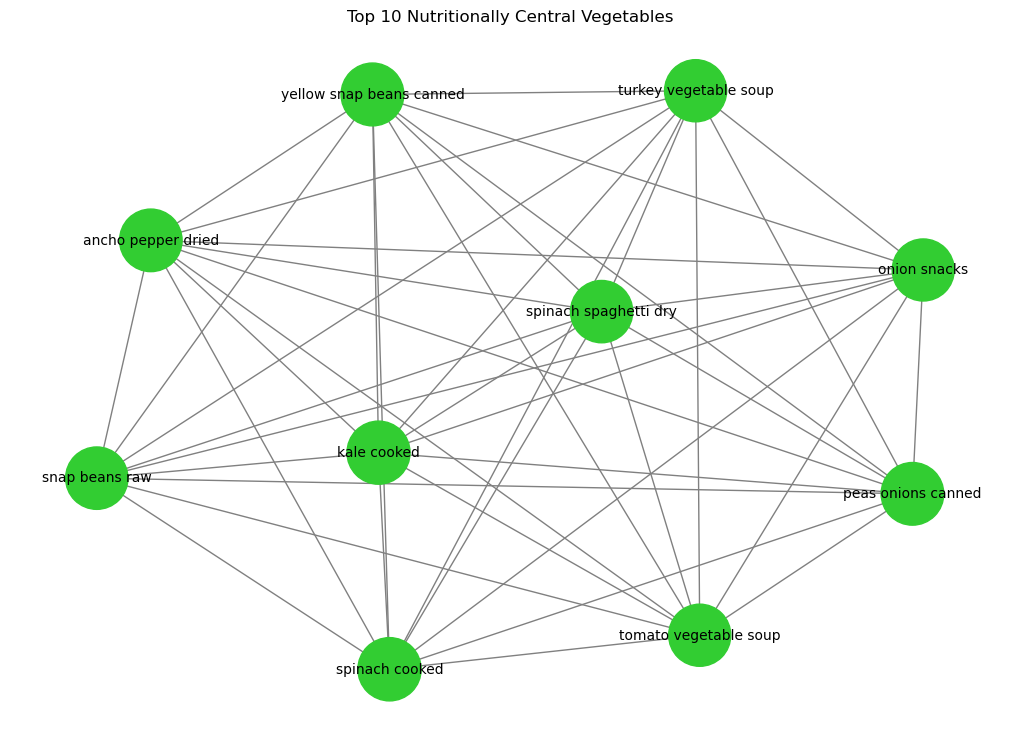

In [30]:
df = pd.read_csv("FOOD-DATA-GROUP1.csv")

# Define FDA Daily Values
fda_dv = {
    'Caloric Value': 2000,
    'Fat': 78,
    'Saturated Fats': 20,
    'Carbohydrates': 275,
    'Sugars': 50,
    'Protein': 50,
    'Dietary Fiber': 28,
    'Cholesterol': 300,
    'Sodium': 2300,
    'Vitamin A': 900,
    'Vitamin C': 90,
    'Calcium': 1300,
    'Iron': 18,
    'Potassium': 4700,
    'Magnesium': 420,
    'Phosphorus': 1250,
    'Zinc': 11,
}
nutrient_cols = list(fda_dv.keys())
vegetable_keywords = ['broccoli', 'carrot', 'spinach', 'brussel', 'asparagus', 'pepper', 'tomato', 'onion', 'vegetable', 
                      'collard', 'kale', 'cauliflower', 'celery', 'bean']
veg_df = df[df['food'].str.lower().str.contains('|'.join(vegetable_keywords))].copy()

# normalize nutrient values with FDA DVs
for col in nutrient_cols:
    veg_df[col] = veg_df[col] / fda_dv[col]
    
g = nx.Graph()
food_names = veg_df['food'].values
food_vectors = veg_df[nutrient_cols].values
threshold = 0.25  # you can tune this

for i in range(len(food_names)):
    for j in range(i + 1, len(food_names)):
        dist = np.linalg.norm(food_vectors[i] - food_vectors[j])
        if dist < threshold:
            g.add_edge(food_names[i], food_names[j], weight=1)

# Compute closeness centrality
closeness_veg = nx.closeness_centrality(g)

# Show top 10 most central vegetables
top_veg = sorted(closeness_veg, key=closeness_veg.get, reverse=True)[:10]
print("Top 10 Most Nutritionally Central Vegetables:")
for veg in top_veg:
    print(veg, round(closeness_veg[veg], 3))

subgraph = g.subgraph(top_veg)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(subgraph, seed=42)
node_sizes = [4000 * closeness_veg[n] for n in subgraph.nodes()]
nx.draw(subgraph, pos, with_labels=True, node_size=node_sizes, node_color='limegreen', font_size=10)
plt.title("Top 10 Nutritionally Central Vegetables")
plt.show()

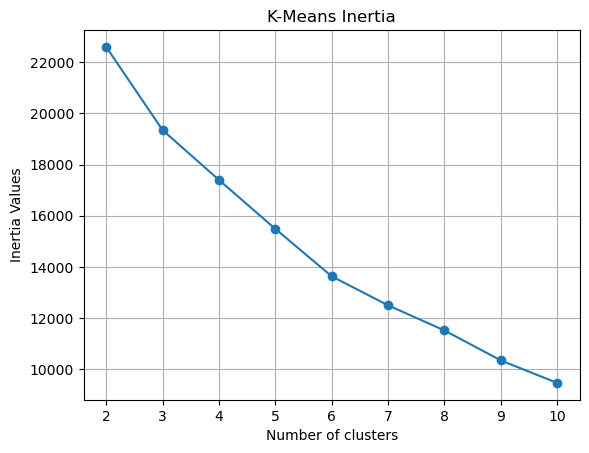

In [45]:
# select features
categories = ['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Nutrition Density']
# drop empty cells
X = df[categories]

# scale data for use
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# setup for finding K-Means
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
# plot graph
plt.plot(k_values, inertia, marker='o')
plt.title('K-Means Inertia')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Values")
plt.grid(True)
plt.show()

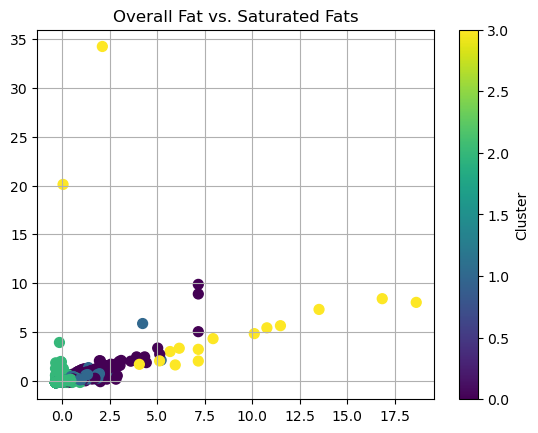

In [55]:
# fit kmeans with k=6 (based on categories chosen)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# columns to compare in scatterplot
caloric_value = X_scaled[:, 0]
fat = X_scaled[:, 1]
saturated_fats = X_scaled[:, 2]
mono_fats = X_scaled[:, 3]
poly_fats = X_scaled[:, 4]
carbs = X_scaled[:, 5]
sugar = X_scaled[:, 6]
protein = X_scaled[:, 7]
fiber = X_scaled[:, 8]
cholesterol = X_scaled[:, 9]
sodium = X_scaled[:, 10]
nutrition = X_scaled[:, 11]

# plot with scatterplot
plt.scatter(fat, saturated_fats, c=clusters, cmap='viridis', s=50)
plt.title('Overall Fat vs. Saturated Fats')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [56]:
df['Cluster'] = kmeans.fit_predict(X_scaled)
cluster_means = df.groupby('Cluster')[categories].mean().round(2)
cluster_means

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Nutrition Density
Cluster,,,,,,,,,,,,
0,710.73,48.04,17.52,19.04,8.59,11.92,1.86,56.83,1.21,426.45,0.82,345.73
1,544.23,11.95,3.19,3.80,3.65,94.46,21.21,17.61,13.27,11.97,0.41,270.99
2,118.32,4.26,1.50,1.81,0.99,12.33,3.19,6.93,1.33,23.41,0.23,63.19
3,3509.38,250.90,144.03,109.42,48.18,0.00,0.00,225.12,0.00,895.65,0.80,644.94
